In [1]:
library(Seurat)
library(SeuratWrappers)
library(ggplot2)
library(scales)
library(STACAS)
library(grid)
library(gridExtra)
library(reshape2)
library(lisi)

Attaching SeuratObject



### Load Data

In [2]:
Sar167=readRDS('ribas/Sarcoma167GEX_final_thresh/Sarcoma167GEX_final_thresh_cb.rds')

In [3]:
Sar322=readRDS('ribas/Sarcoma322GEX_final_thresh/Sarcoma322GEX_final_thresh_cb.rds')

In [4]:
Sar559=readRDS('ribas/Sarcoma559GEX_final_thresh/Sarcoma559GEX_final_thresh_cb.rds')

In [6]:
Sar708=readRDS('ribas/Sarcoma708GEX_final_thresh/Sarcoma708GEX_final_thresh_cb.rds')

In [24]:
NSCL_merged <- merge(Sar167, 
                     y = c(Sar322,Sar559,Sar708), add.cell.ids = c("Sarcoma167GEX","Sarcoma322GEX","Sarcoma559GEX","Sarcoma708GEX"), project = "Sarcoma")


In [25]:
genes=read.csv("ribas/sarcoma/Sarcoma_hvg_list.csv",header=FALSE)

In [26]:
mat<-as.data.frame(GetAssayData(object = NSCL_merged, slot = "counts"))

In [27]:
NSCL_merged=CreateSeuratObject(mat[unlist(genes),], project = "NSCL", assay = "RNA",meta.data = NSCL_merged@meta.data)


In [28]:
NSCL_merged.list <- SplitObject(NSCL_merged,split.by='orig.ident')

### Raw Control

In [13]:
NSCL_merged <- NormalizeData(NSCL_merged)
NSCL_merged <- FindVariableFeatures(NSCL_merged)

In [14]:
NSCL_merged <- ScaleData(NSCL_merged)
NSCL_merged <- RunPCA(NSCL_merged, features = NSCL_merged@assays$RNA@var.features, ndims.print = 1:5, nfeatures.print = 5)

Centering and scaling data matrix

PC_ 1 
Positive:  CCDC102B, IL1RAPL1, EPS8, CASC15, GUCY1B1 
Negative:  CD74, RGS1, SAMSN1, SRGN, ST6GAL1 
PC_ 2 
Positive:  PDE4B, EPB41L3, ZBTB16, ZNF704, CD74 
Negative:  AC090015.1, LINC00922, AL117329.1, AC092957.1, RFX8 
PC_ 3 
Positive:  AC108734.4, AC233296.1, AC124852.1, PCDH9, LINC02511 
Negative:  PELI1, RGS1, BCAT1, CSGALNACT1, ST6GAL1 
PC_ 4 
Positive:  MZB1, FCRL5, TENT5C, POU2AF1, IFNG-AS1 
Negative:  CD163, MCTP1, KCNMA1, FRMD4B, MS4A6A 
PC_ 5 
Positive:  MT2A, PDGFRA, FTH1, SDC2, MGP 
Negative:  THSD7A, KCNN3, ACOXL, GALNT18, FCRL5 



In [15]:
ndim=10
NSCL_merged <- RunUMAP(NSCL_merged, reduction = "pca", dims = 1:ndim, seed.use=123)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:34:47 UMAP embedding parameters a = 0.9922 b = 1.112

22:34:47 Read 47258 rows and found 10 numeric columns

22:34:47 Using Annoy for neighbor search, n_neighbors = 30

22:34:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:34:58 Writing NN index file to temp file /tmp/RtmpTWZ4xU/file11a72f53eb25

22:34:58 Searching Annoy index using 1 thread, search_k = 3000

22:35:29 Annoy recall = 100%

22:35:30 Commencing smooth kNN distance calibration using 1 thread

22:35:34 Initializing fr

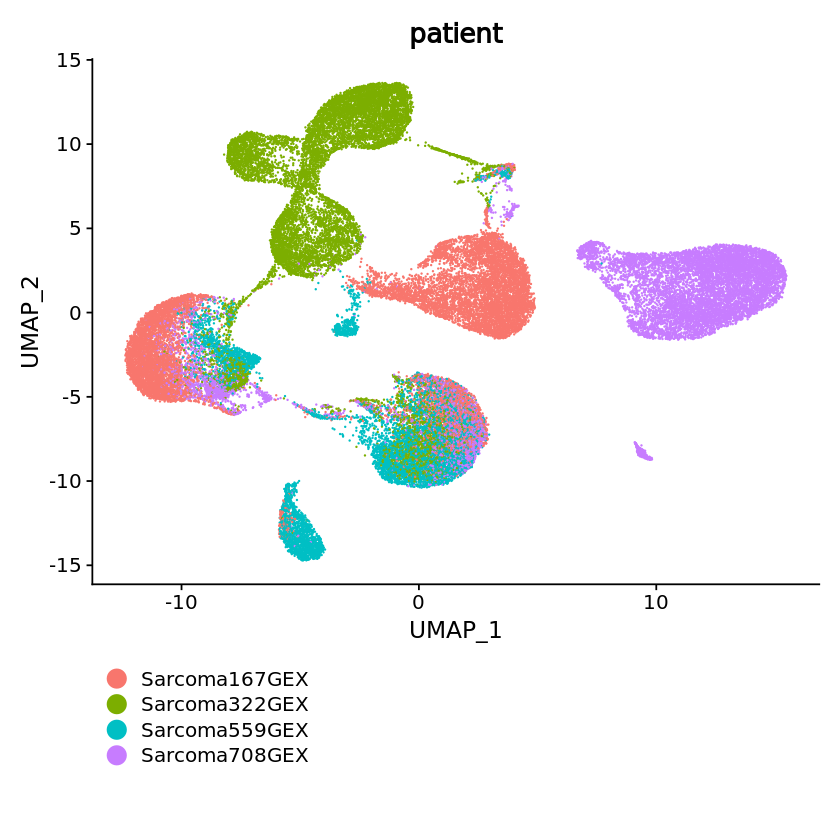

In [16]:
DimPlot(NSCL_merged, group.by = c("patient"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))


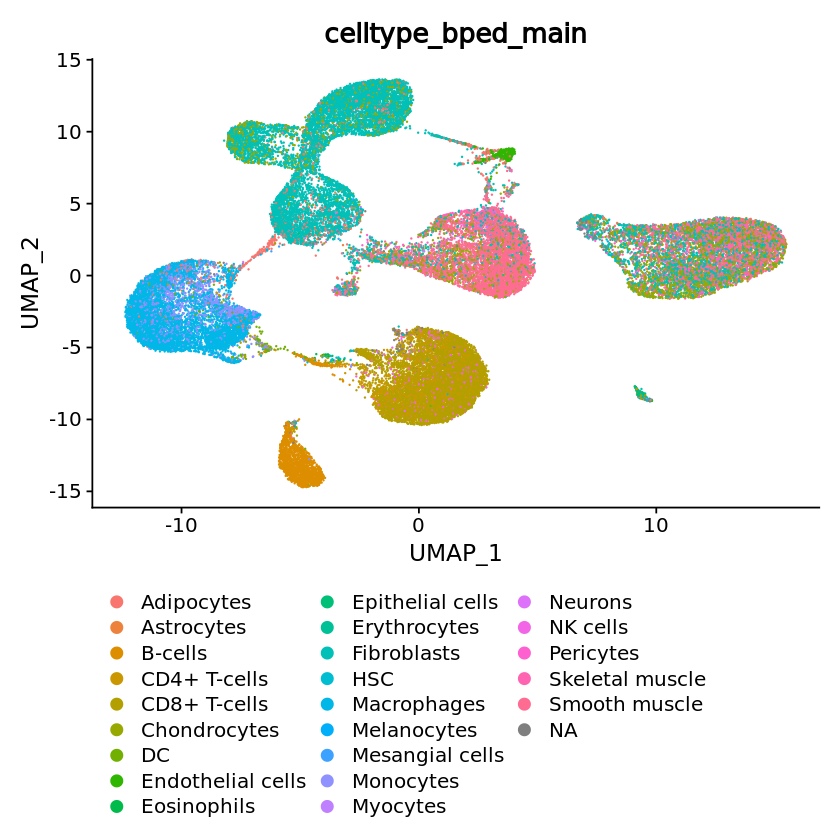

In [17]:
DimPlot(NSCL_merged, group.by = c("celltype_bped_main"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [19]:
pcs=prcomp(t(as.matrix(NSCL_merged@assays$RNA[c(1:8000)])),rank=20)

In [20]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.079625

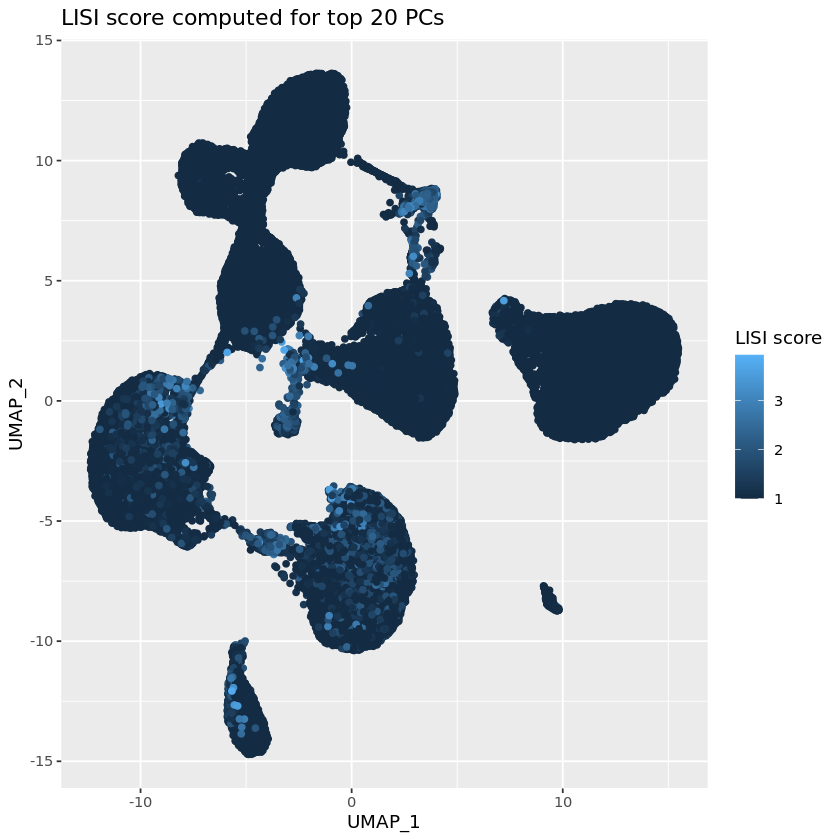

In [22]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

In [2]:
NSCL_merged=readRDS("ribas/sarcoma/Sarcoma_raw_Seurat.rds")

In [3]:
annot=read.csv("ribas/DEGs/Sarcoma_annotations")

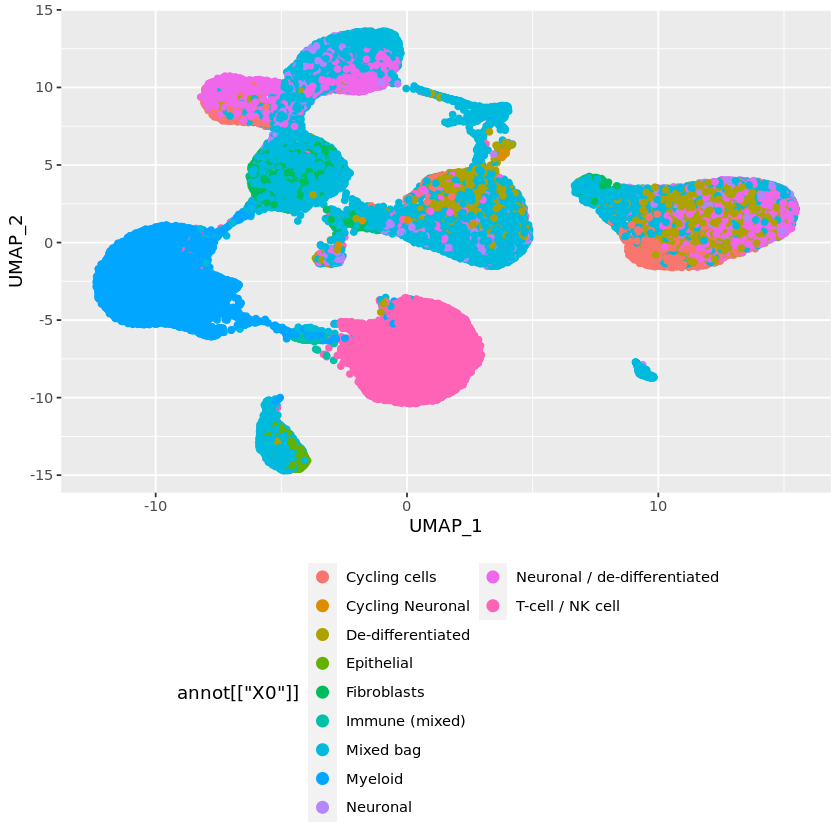

In [4]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### STACAS

In [29]:
var.genes.n <- 800
var.genes.integrated.n <- 500

for (i in 1:length(NSCL_merged.list)) {
    NSCL_merged.list[[i]] <- NormalizeData(NSCL_merged.list[[i]], verbose = FALSE)
    
    NSCL_merged.list[[i]] <- FindVariableFeatures(NSCL_merged.list[[i]], selection.method = "vst", 
        nfeatures = var.genes.n*2, verbose = FALSE)
    
    #mito.genes <- grep(pattern = "^mt-", rownames(ref.list[[i]]), value = TRUE)
    #ribo.genes <- grep(pattern = "^Rp[ls]", rownames(ref.list[[i]]), value = TRUE)
    
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, cellCycle.symbol)
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, mito.genes)
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, ribo.genes)
    NSCL_merged.list[[i]]@assays$RNA@var.features <- head( NSCL_merged.list[[i]]@assays$RNA@var.features, var.genes.n)
}

In [30]:
ndim=10
ref.anchors <- FindAnchors.STACAS(NSCL_merged.list, dims=1:ndim, anchor.features=var.genes.integrated.n)

Computing 500 integration features

Preparing PCA embeddings for objects...



 1/4 2/4 3/4 4/4


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 1439 anchors

Finding neighborhoods

Finding anchors

	Found 3002 anchors

Finding neighborhoods

Finding anchors

	Found 1971 anchors

Finding neighborhoods

Finding anchors

	Found 2534 anchors

Finding neighborhoods

Finding anchors

	Found 2196 anchors

Finding neighborhoods

Finding anchors

	Found 2075 anchors



In [31]:
names <- names(NSCL_merged.list)

plots <- PlotAnchors.STACAS(ref.anchors, obj.names=names)

g.cols <- 2
g.rows <- as.integer((length(plots)+2)/g.cols)
g <- do.call("arrangeGrob", c(plots, ncol=g.cols, nrow=g.rows))

Picking joint bandwidth of 0.0354

Picking joint bandwidth of 0.0365

Picking joint bandwidth of 0.0288

Picking joint bandwidth of 0.0353



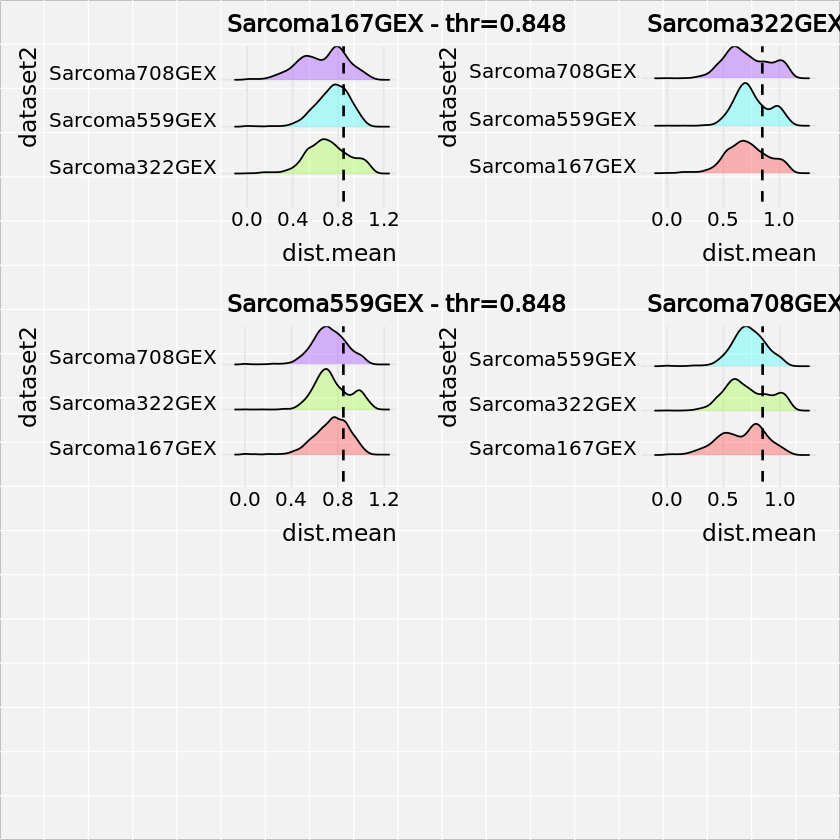

In [32]:
plot(g,combine=FALSE)

In [33]:
ref.anchors.filtered <- FilterAnchors.STACAS(ref.anchors)

Filter anchors using distance threshold t=0.848



In [34]:
#Before
anchor.stats.before <- table(ref.anchors@anchors[,c("dataset1","dataset2")])

#After
anchor.stats.after <- table(ref.anchors.filtered@anchors[,c("dataset1","dataset2")])

rownames(anchor.stats.before) <- names(NSCL_merged.list)
colnames(anchor.stats.before) <- names(NSCL_merged.list)
rownames(anchor.stats.after) <- names(NSCL_merged.list)
colnames(anchor.stats.after) <- names(NSCL_merged.list)
anchor.stats.before

               dataset2
dataset1        Sarcoma167GEX Sarcoma322GEX Sarcoma559GEX Sarcoma708GEX
  Sarcoma167GEX             0          1439          3002          2534
  Sarcoma322GEX          1439             0          1971          2196
  Sarcoma559GEX          3002          1971             0          2075
  Sarcoma708GEX          2534          2196          2075             0

In [35]:
anchor.stats.after

               dataset2
dataset1        Sarcoma167GEX Sarcoma322GEX Sarcoma559GEX Sarcoma708GEX
  Sarcoma167GEX             0          1084          2173          2027
  Sarcoma322GEX          1084             0          1430          1562
  Sarcoma559GEX          2173          1430             0          1652
  Sarcoma708GEX          2027          1562          1652             0

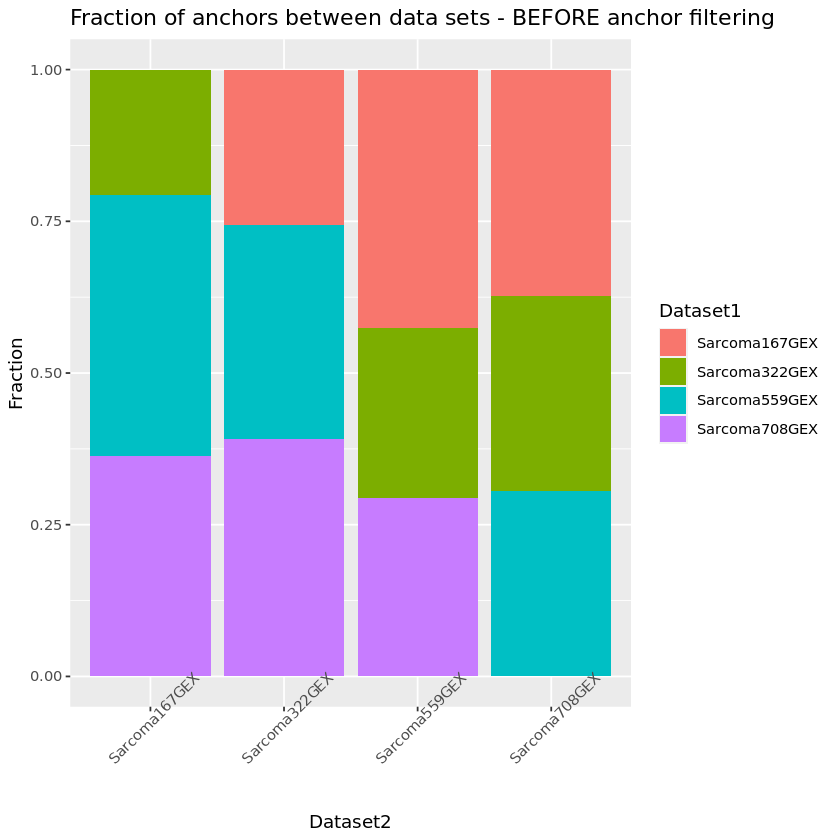

In [36]:
anchor.stats.before.norm <- apply(anchor.stats.before, 1, function(x) {x/sum(x)})
toplot <- melt(anchor.stats.before.norm, varnames=c("Dataset1","Dataset2"), value.name = "Fraction")
ggplot(toplot, aes(fill=Dataset1, y=Fraction, x=Dataset2)) + 
    geom_bar(position="stack", stat="identity") +
  theme(axis.text.x = element_text(angle = 45)) +
    ggtitle("Fraction of anchors between data sets - BEFORE anchor filtering")

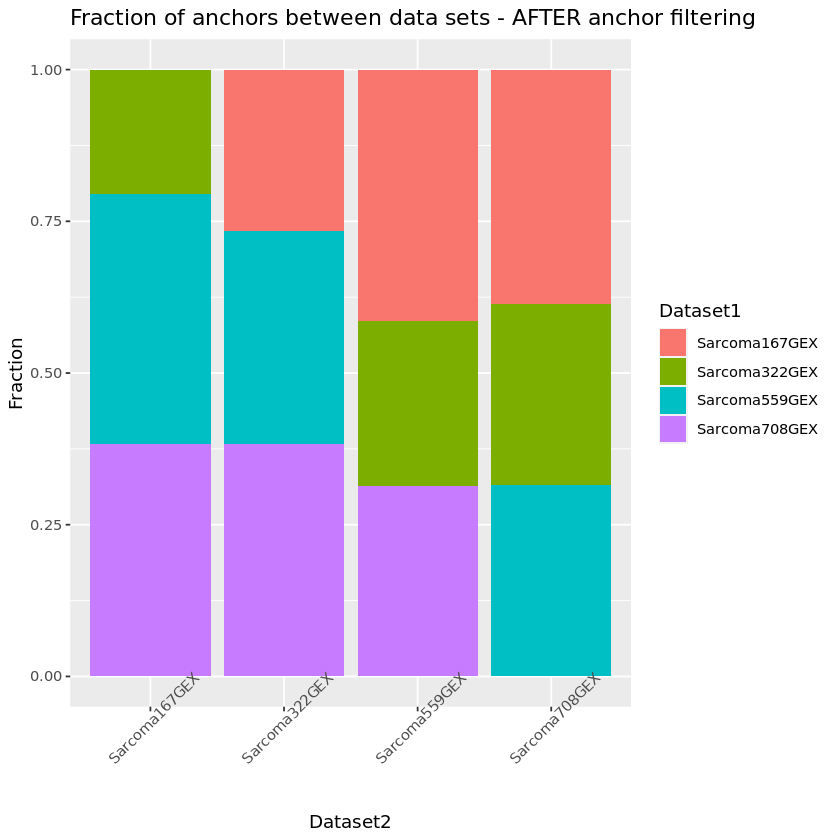

In [37]:
anchor.stats.after.norm <- apply(anchor.stats.after, 1, function(x) {x/sum(x)})
toplot <- melt(anchor.stats.after.norm, varnames=c("Dataset1","Dataset2"), value.name = "Fraction")
ggplot(toplot, aes(fill=Dataset1, y=Fraction, x=Dataset2)) + 
    geom_bar(position="stack", stat="identity") +
  theme(axis.text.x = element_text(angle = 45)) +
    ggtitle("Fraction of anchors between data sets - AFTER anchor filtering")

In [38]:
all.genes <- row.names(NSCL_merged.list[[1]])
for (i in 2:length(NSCL_merged.list)) {
   all.genes <- intersect(all.genes, row.names(NSCL_merged.list[[i]]))
}

mySampleTree <- SampleTree.STACAS(ref.anchors.filtered)
print(mySampleTree)

     [,1] [,2]
[1,]   -1   -3
[2,]    1   -4
[3,]    2   -2


In [39]:
ref.integrated <- IntegrateData(anchorset=ref.anchors.filtered, dims=1:ndim, features.to.integrate=all.genes,
                                sample.tree=mySampleTree, preserve.order=T)

Merging dataset 3 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 into 1 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 1 3 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [40]:
ndim=15
length(ref.integrated@assays$integrated@var.features)

ref.integrated <- ScaleData(ref.integrated, verbose = TRUE)
ref.integrated <- RunPCA(ref.integrated, features = ref.integrated@assays$integrated@var.features,
                         ndims.print = 1:5, nfeatures.print = 5)

ndim=10  #how many PCA components to retain

ref.integrated <- RunUMAP(ref.integrated, reduction = "pca", dims = 1:ndim, seed.use=123, n.neighbors = 30, min.dist=0.3)


[1] 500

Centering and scaling data matrix

PC_ 1 
Positive:  PDE3A, SEMA5A, CCDC102B, CASC15, ABCC9 
Negative:  SFMBT2, CD74, SAMSN1, CD163, MERTK 
PC_ 2 
Positive:  PLXDC2, SLC8A1, MAML3, CD163, MEF2C 
Negative:  AC011287.1, AL117329.1, AC090125.1, VEGFC, TENM2 
PC_ 3 
Positive:  VWF, EGFL7, ANO2, AFAP1L1, THSD7A 
Negative:  ADGRL3, IL1RAPL1, CCDC102B, HPSE2, SLC8A1 
PC_ 4 
Positive:  NEDD9, IGHG3, AC108734.4, FCRL5, CLNK 
Negative:  DOCK4, CD163, PLXDC2, MS4A6A, SLCO2B1 
PC_ 5 
Positive:  AC108734.4, LINC02511, PCDH9, GALNT13, NEGR1 
Negative:  FCRL5, IFNG-AS1, POU2AF1, IGHG3, NEDD9 

23:21:04 UMAP embedding parameters a = 0.9922 b = 1.112

23:21:05 Read 47258 rows and found 10 numeric columns

23:21:05 Using Annoy for neighbor search, n_neighbors = 30

23:21:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

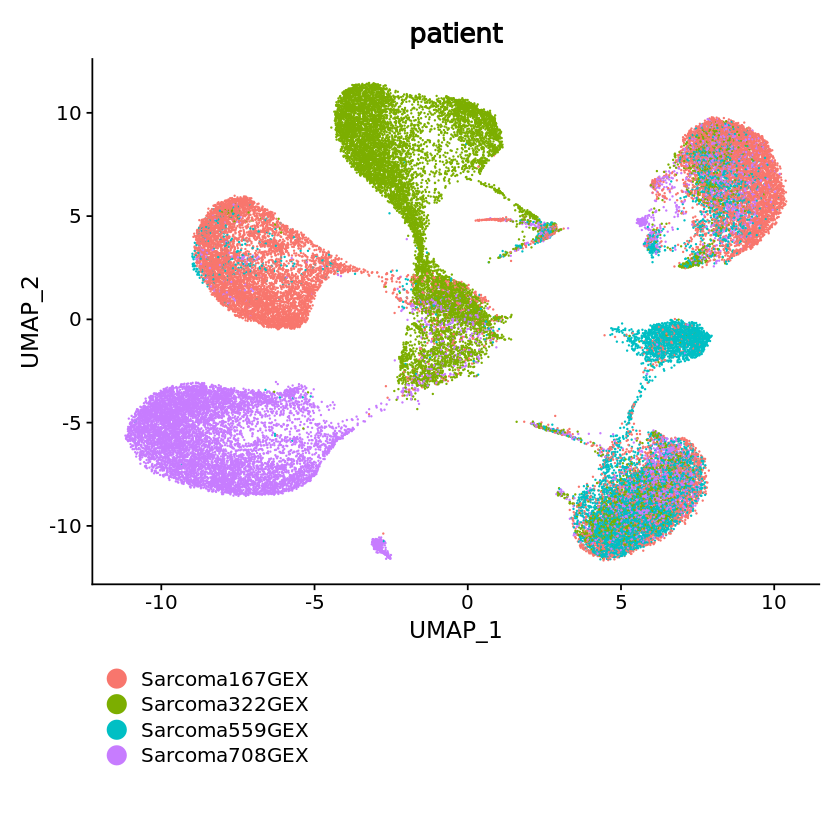

In [41]:
DimPlot(ref.integrated, reduction = "umap", group.by = "patient", shuffle=TRUE) +theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))


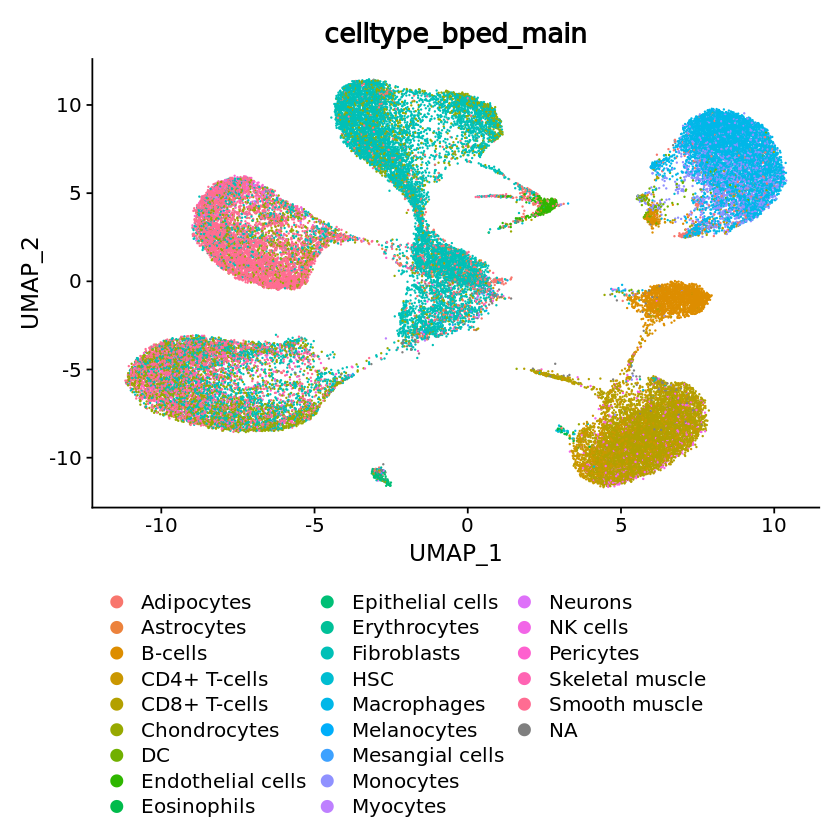

In [42]:
DimPlot(ref.integrated, reduction = "umap", group.by = "celltype_bped_main", shuffle=TRUE) +theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [45]:
pcs=prcomp(t(as.matrix(ref.integrated@assays$integrated[c(1:8000)])),rank=20)

In [46]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.472023

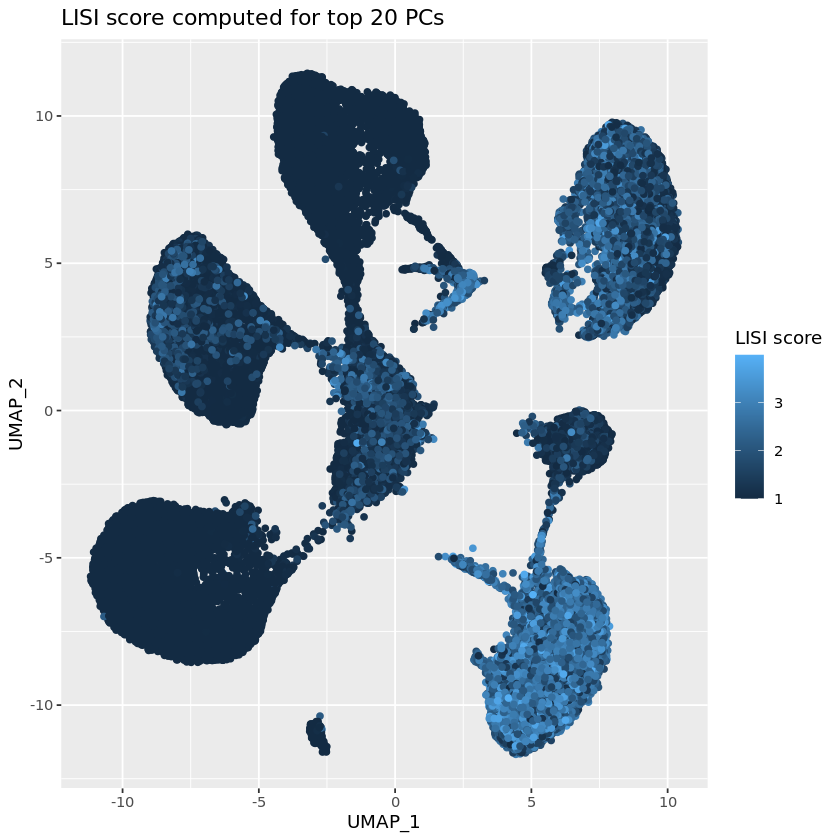

In [49]:
ggplot(as.data.frame(ref.integrated[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

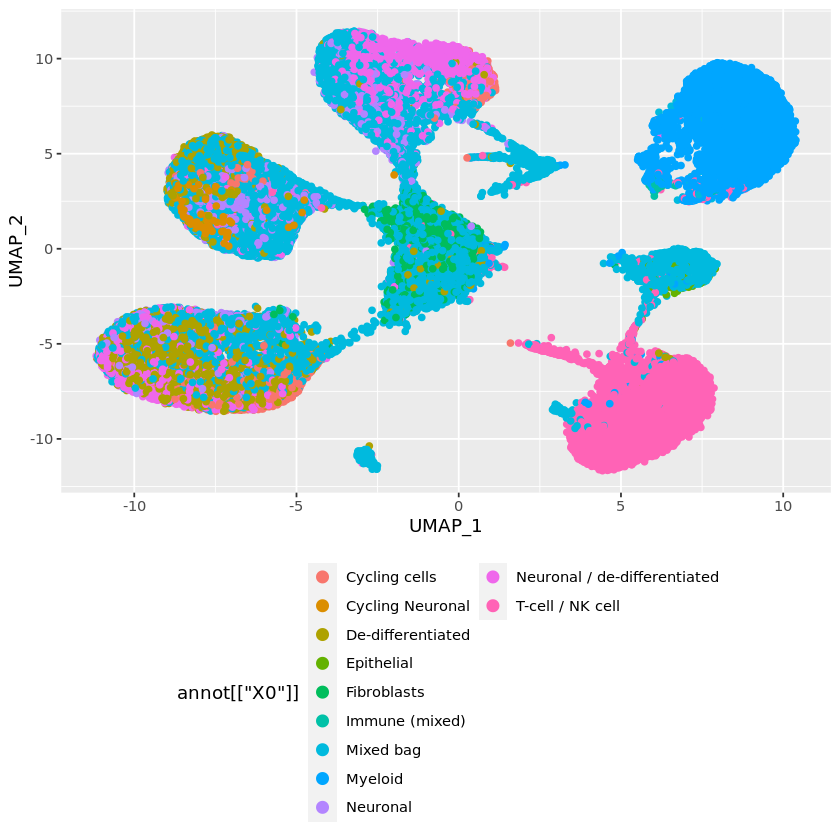

In [5]:
#saveRDS(ref.integrated,"ribas/sarcoma/Sarcoma_STACAS_merged.rds")
NSCL_merged=readRDS("ribas/sarcoma/Sarcoma_STACAS_merged.rds")

ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### FastMNN

In [51]:
NSCL_merged <- NormalizeData(NSCL_merged)
NSCL_merged <- FindVariableFeatures(NSCL_merged)

In [52]:
NSCL_merged <- RunFastMNN(object.list = SplitObject(NSCL_merged,split.by='orig.ident'),features=rownames(NSCL_merged))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mnn.reconstructed_ to mnnreconstructed_”


In [53]:
NSCL_merged <- RunUMAP(NSCL_merged, reduction = "mnn", dims = 1:30)

23:47:51 UMAP embedding parameters a = 0.9922 b = 1.112

23:47:51 Read 47258 rows and found 30 numeric columns

23:47:51 Using Annoy for neighbor search, n_neighbors = 30

23:47:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:47:56 Writing NN index file to temp file /tmp/RtmpTWZ4xU/file11a737f43c9c

23:47:56 Searching Annoy index using 1 thread, search_k = 3000

23:48:09 Annoy recall = 100%

23:48:10 Commencing smooth kNN distance calibration using 1 thread

23:48:13 Initializing from normalized Laplacian + noise

23:48:20 Commencing optimization for 200 epochs, with 2057598 positive edges

23:48:41 Optimization finished



In [54]:
NSCL_merged <- FindNeighbors(NSCL_merged, reduction = "mnn", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [55]:
NSCL_merged <- FindClusters(NSCL_merged)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 47258
Number of edges: 1597839

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9026
Number of communities: 21
Elapsed time: 11 seconds


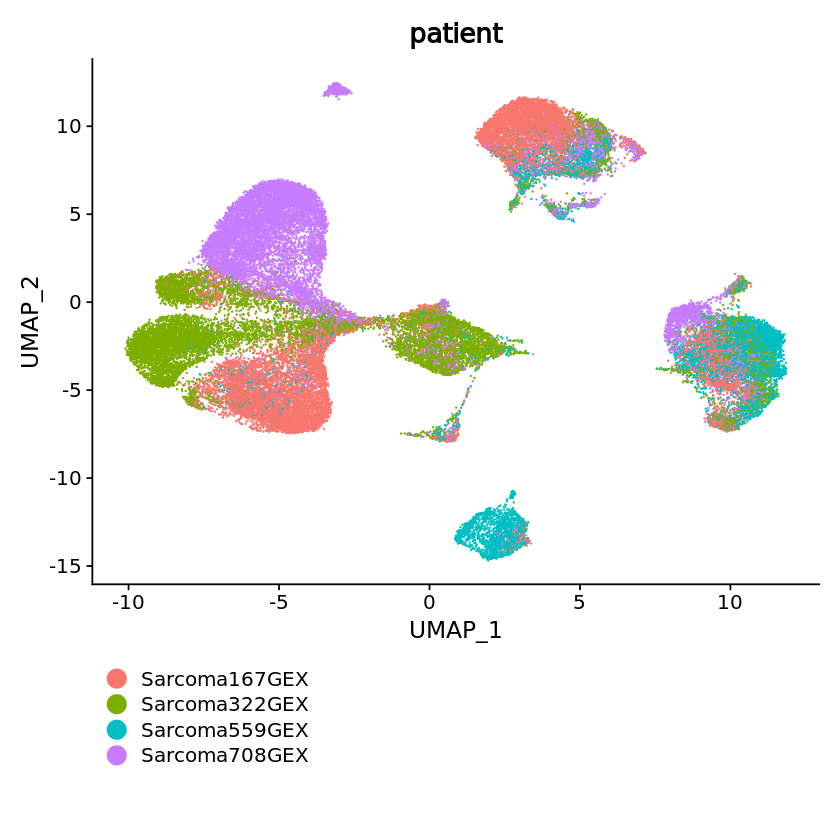

In [56]:
DimPlot(NSCL_merged, group.by = c("patient"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))



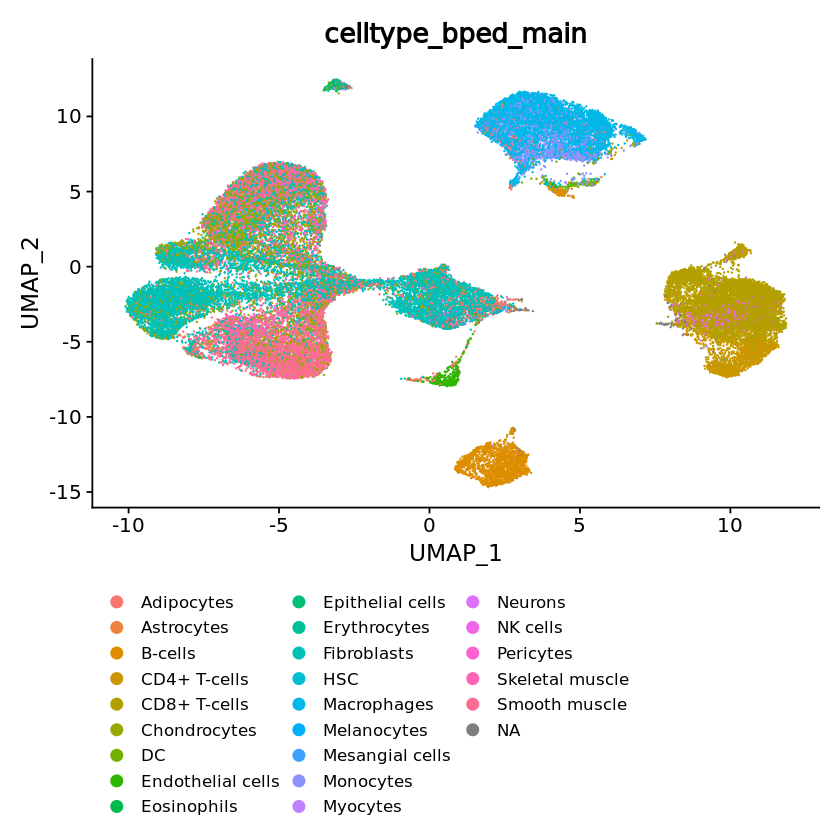

In [57]:
DimPlot(NSCL_merged, group.by = c("celltype_bped_main"), ncol = 1, shuffle=TRUE)+theme(legend.text=element_text(size=10),legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))

In [58]:
saveRDS(NSCL_merged,"ribas/sarcoma/Sarcoma_fastMNN.rds")

In [6]:
NSCL_merged <- readRDS("ribas/sarcoma/Sarcoma_fastMNN.rds")

In [12]:
pcs=prcomp(t(as.matrix(NSCL_merged@assays$mnn.reconstructed[c(1:8000)])),rank=20)

In [13]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.492839

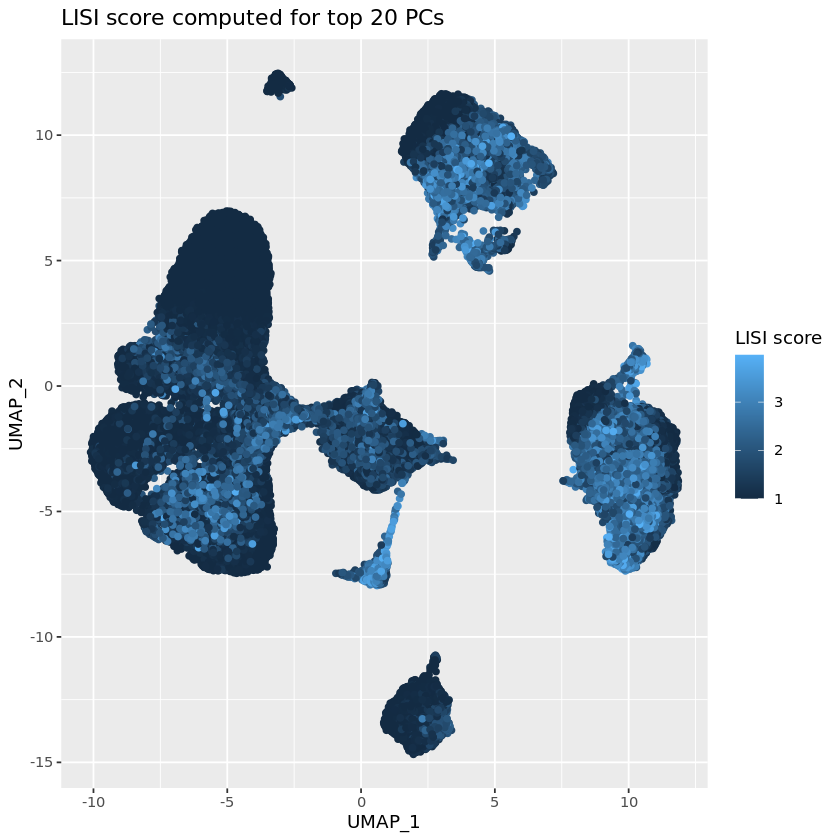

In [14]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

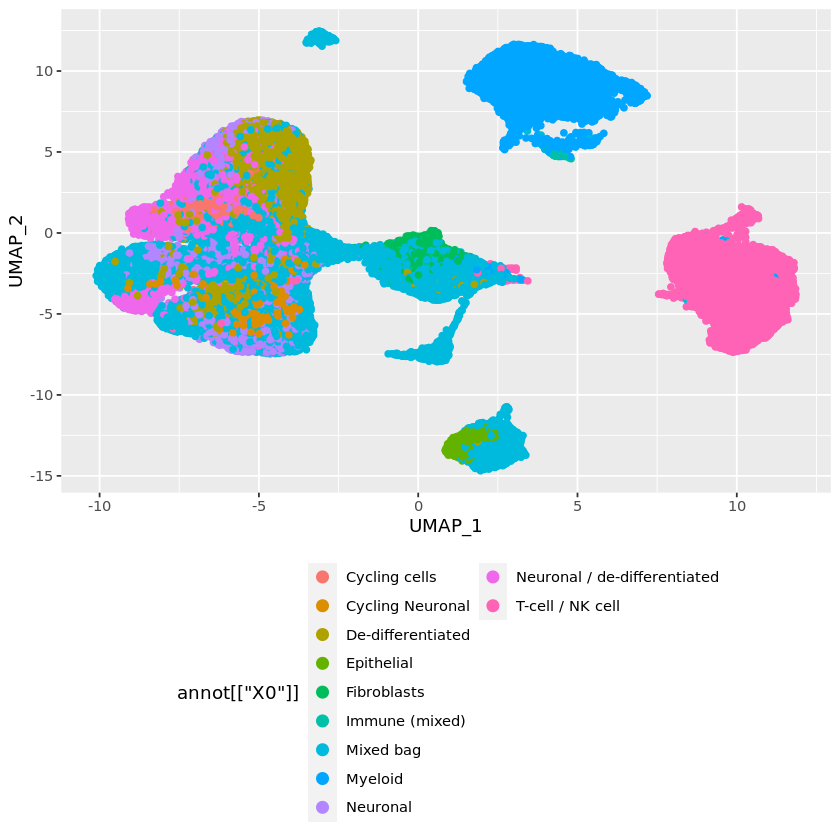

In [7]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### LISI for SCVI and Scanorama

In [2]:
scvi_latent <- read.csv("ribas/sarcoma/Sarcoma_scvi_latent_components.csv")

In [8]:
scvi_latent_umap <- read.csv("ribas/sarcoma/Sarcoma_scvi_latent_umap.csv")

In [4]:
scvi_cells <- read.csv("ribas/sarcoma/Sarcoma_orig.ident.csv")

In [7]:
scvi_dense <- read.csv("ribas/sarcoma/Sarcoma_scvi_dense_pcs.csv")

In [9]:
scvi_dense_umap <- read.csv("ribas/sarcoma/Sarcoma_scvi_dense_umap.csv")

In [5]:
umap_coords=scvi_latent[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23","X24","X25","X26","X27","X28","X29")]

labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.489988

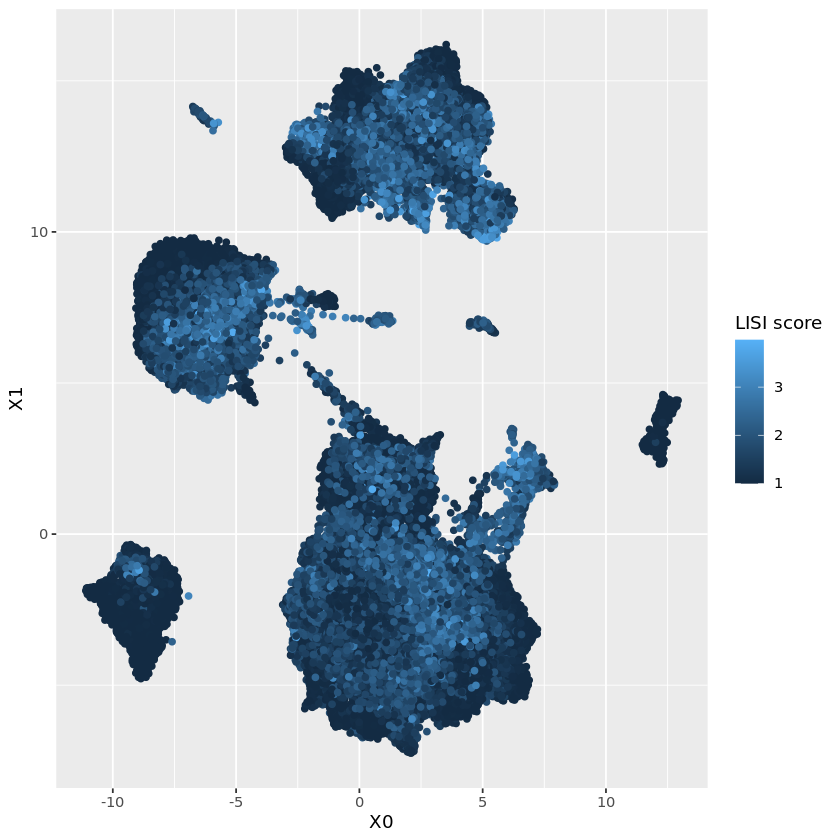

In [6]:
ggplot(scvi_latent_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


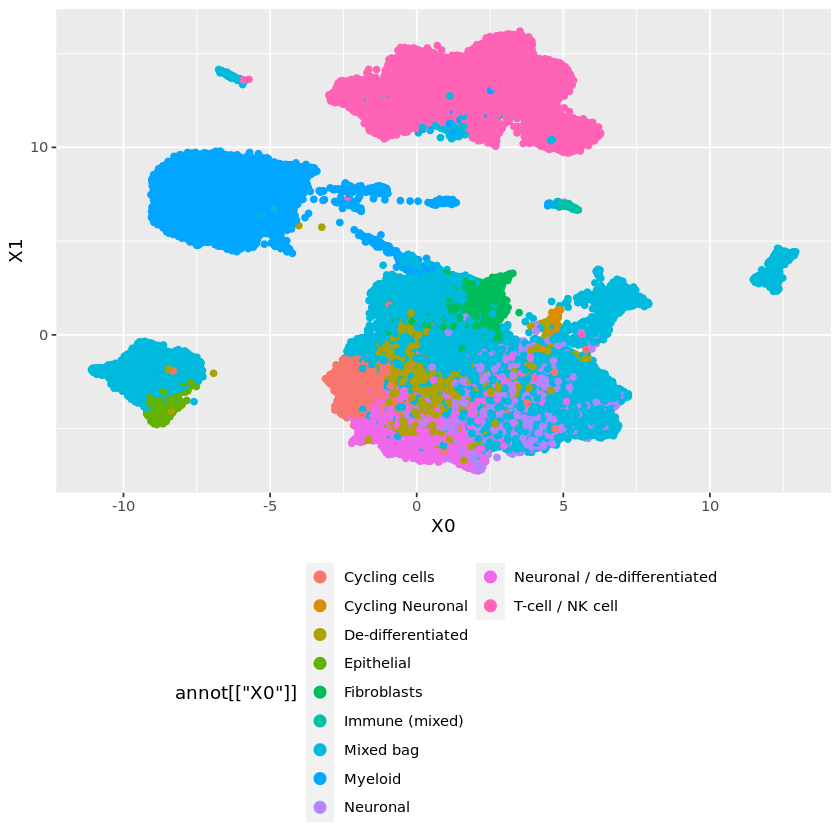

In [10]:
ggplot(scvi_latent_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [9]:
umap_coords=scvi_dense[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.729929

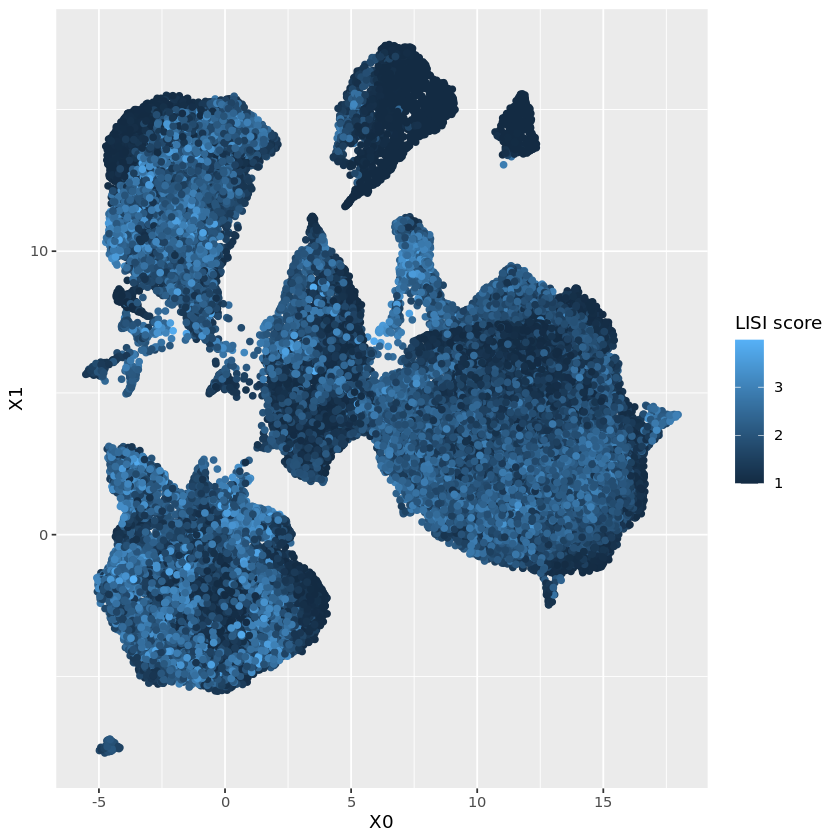

In [10]:
ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


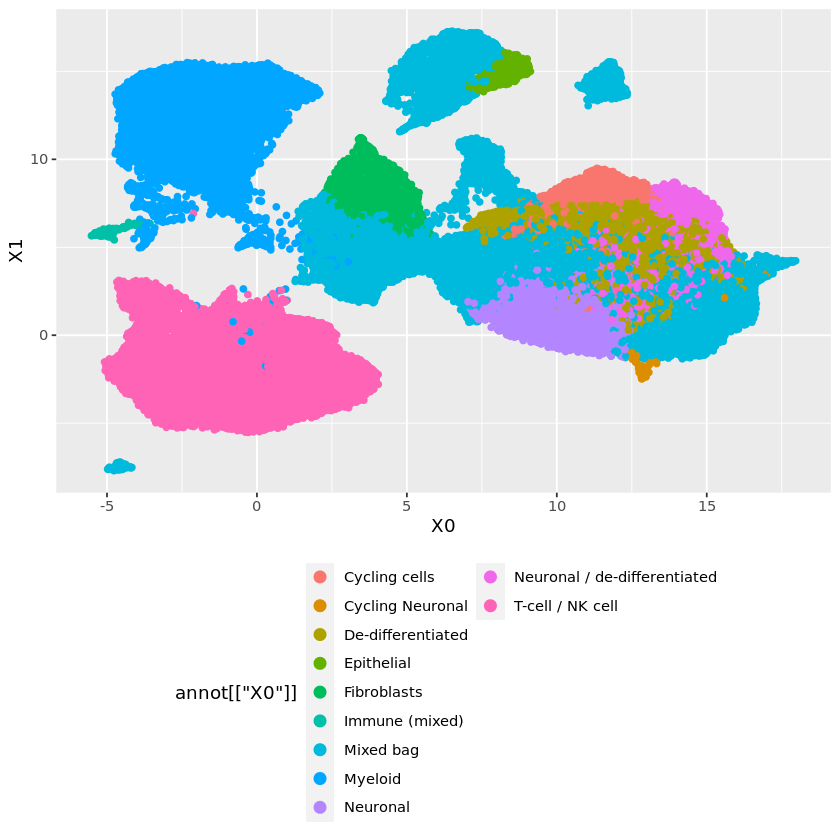

In [11]:
ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [13]:
#scano_cells <- read.csv("ribas/sarcoma/Sarcoma_orig.ident.csv")
#scano_latent <- read.csv("ribas/sarcoma/Sarcoma_scanorama_latent_components.csv")
scano_latent_umap <- read.csv("ribas/sarcoma/Sarcoma_scanorama_latent_umap.csv")

tmp <- c()
for (i in 1:99)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

umap_coords=scano_latent[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.246241

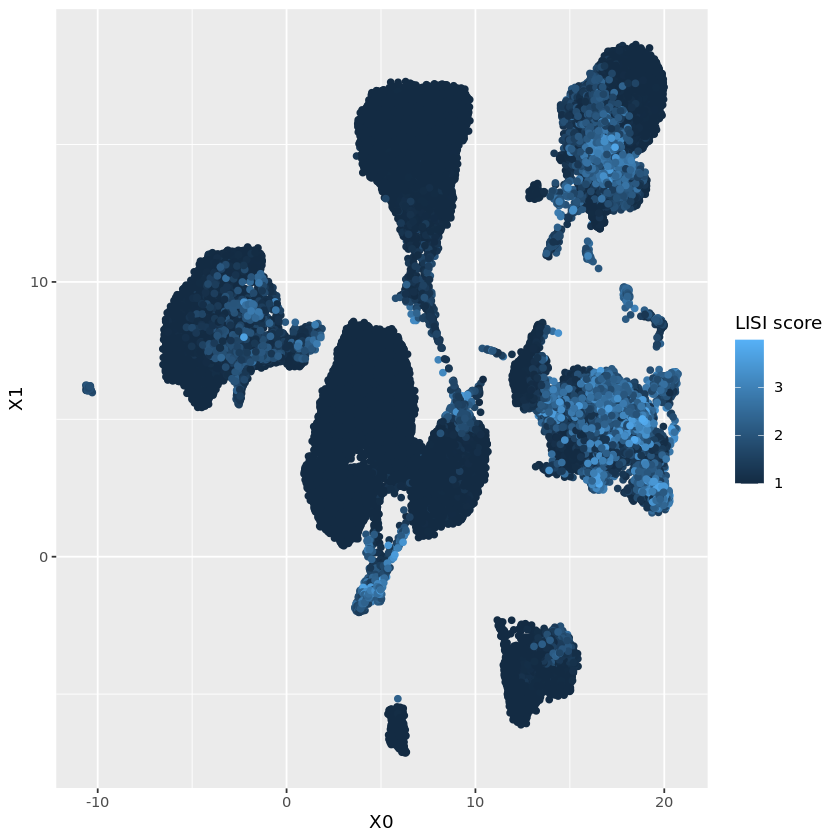

In [13]:
ggplot(scano_latent_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


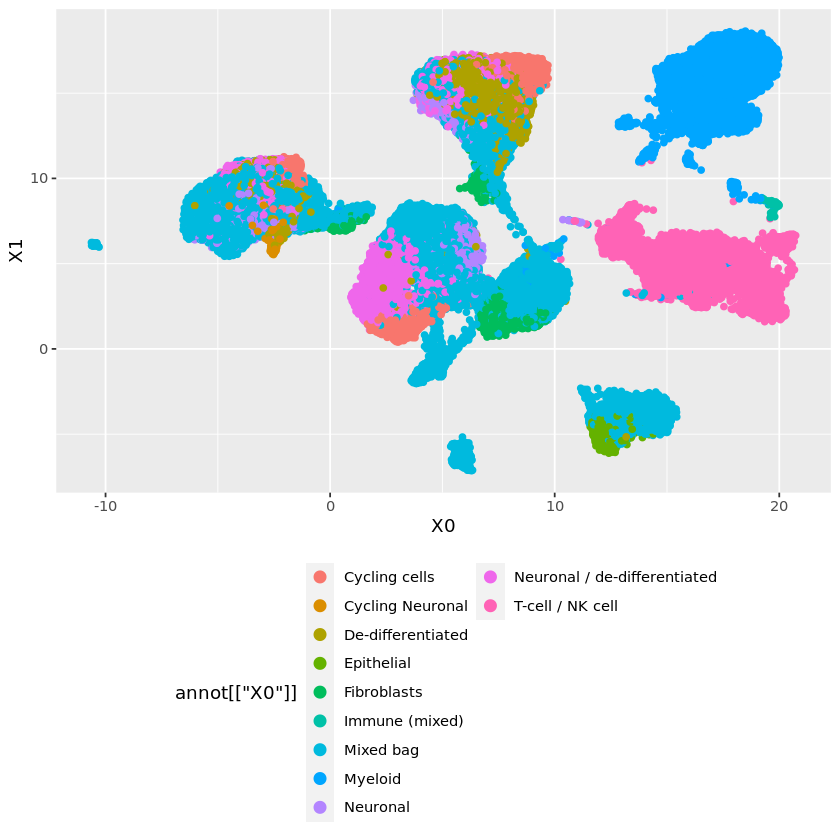

In [14]:
ggplot(scano_latent_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [15]:
#scano_dense <- read.csv("ribas/sarcoma/Sarcoma_scanorama_pcs.csv")
scano_dense_umap <- read.csv("ribas/sarcoma/Sarcoma_scanorama_dense_umap.csv")

tmp <- c()
for (i in 1:19)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

In [15]:
umap_coords=scano_dense[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.395302

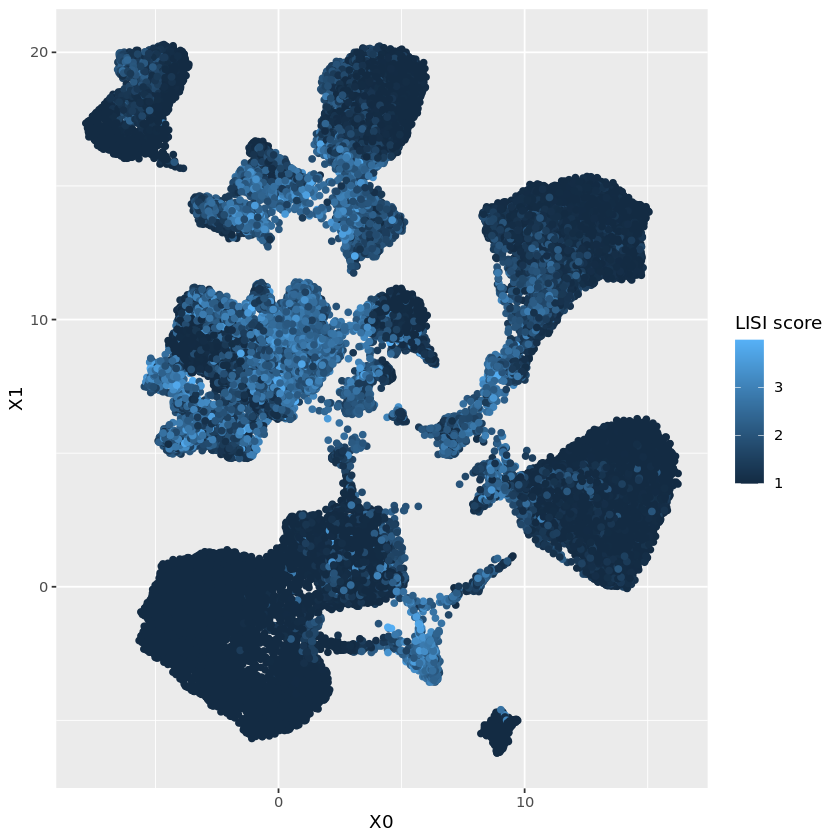

In [16]:
ggplot(scano_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 

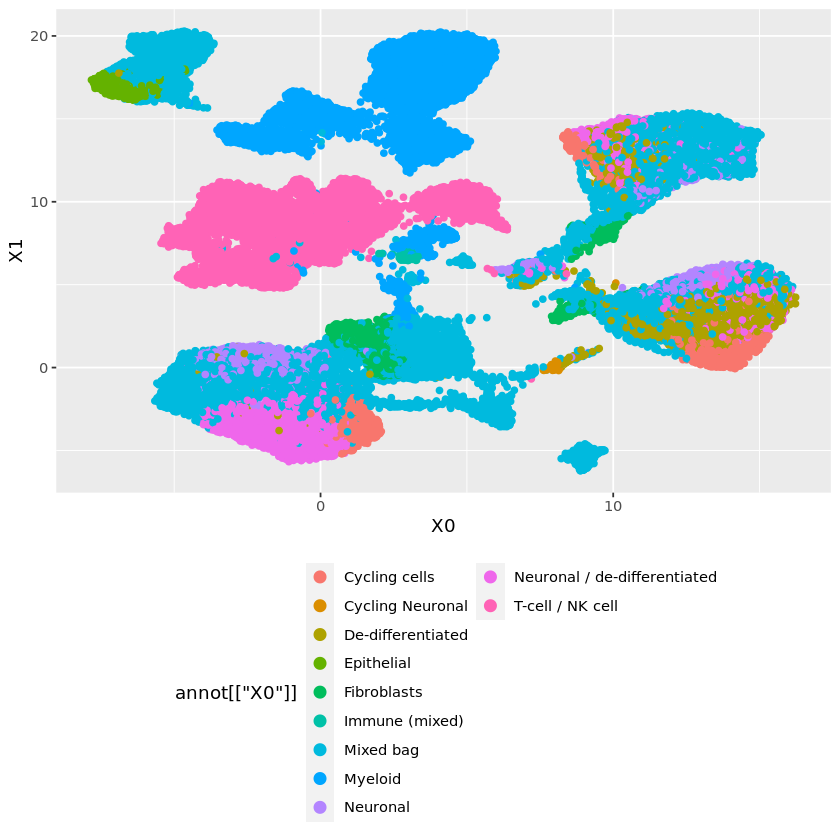

In [16]:
ggplot(scano_dense_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [17]:
raw <- read.csv("ribas/sarcoma/Sarcoma_merged_NO_BATCH_pcs.csv")

In [2]:
raw_umap <- read.csv("ribas/sarcoma/Sarcoma_raw_umap.csv")

In [19]:
umap_coords=raw[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.079841

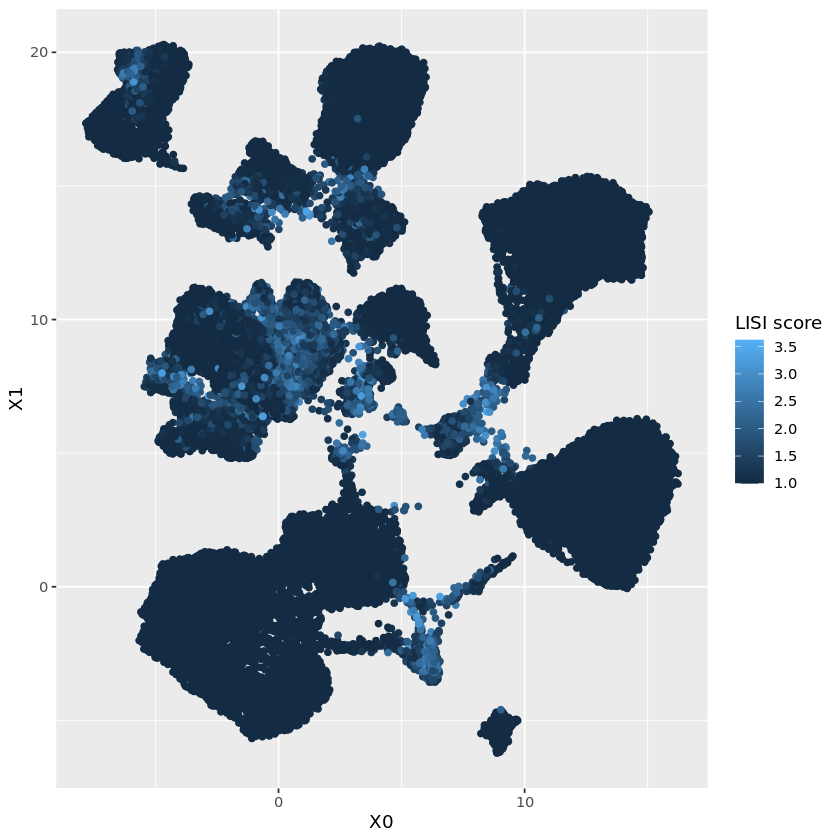

In [20]:
ggplot(raw_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


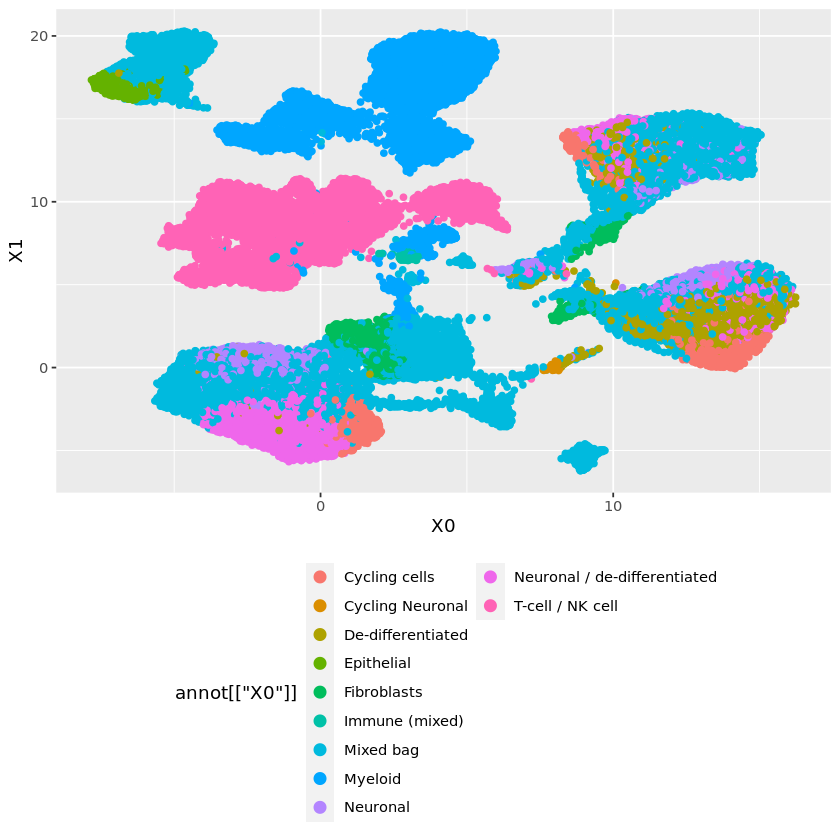

In [4]:
ggplot(raw_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### kBet

In [21]:
library(kBET)

In [ ]:
batch.estimate <- kBET(as.matrix(NSCL_merged@assays$RNA@data),NSCL_merged@meta.data$patient)

In [22]:
NSCL_merged_split <- SplitObject(NSCL_merged,split.by='orig.ident')

In [39]:
sample <- as.data.frame(NSCL_merged_split[1])
batch <- names(sample)
subset_size <- 0.1 #subsample to 10% of the data
subset_id <- sample.int(n = length(batch), size = floor(subset_size * length(batch)), replace=FALSE)

In [37]:
nrow(sample)

NULL

In [41]:
sample <- as.matrix(NSCL_merged_split[1])